In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv('data/birth.txt')
df.head()

num_births
0         295
1         286
2         300
3         278
4         272

In [4]:
print df.shape[0]/31 #31 years
print df.shape

12
(372, 1)


In [5]:
df['dates']=pd.date_range("1980-01-01", "2010-12-31", freq="1M")

In [6]:
df.head()

num_births      dates
0         295 1980-01-31
1         286 1980-02-29
2         300 1980-03-31
3         278 1980-04-30
4         272 1980-05-31

def acf_pacf(ts, lags):
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(ts, lags=lags, ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(ts, lags=lags, ax=ax2)

In [7]:
df['time'] = range(372)

In [8]:
df['month'] = pd.DatetimeIndex(df.dates).month
df['year'] = pd.DatetimeIndex(df.dates).year
df['quarters'] = pd.DatetimeIndex(df['dates']).quarter

In [9]:
df.head()

num_births      dates  time  month  year  quarters
0         295 1980-01-31     0      1  1980         1
1         286 1980-02-29     1      2  1980         1
2         300 1980-03-31     2      3  1980         1
3         278 1980-04-30     3      4  1980         2
4         272 1980-05-31     4      5  1980         2

In [10]:
df = df.set_index('dates')

In [11]:
df.head()

num_births  time  month  year  quarters
dates                                              
1980-01-31         295     0      1  1980         1
1980-02-29         286     1      2  1980         1
1980-03-31         300     2      3  1980         1
1980-04-30         278     3      4  1980         2
1980-05-31         272     4      5  1980         2

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 372 entries, 1980-01-31 to 2010-12-31
Data columns (total 5 columns):
num_births    372 non-null int64
time          372 non-null int64
month         372 non-null int32
year          372 non-null int32
quarters      372 non-null int32
dtypes: int32(3), int64(2)
memory usage: 13.1 KB


In [13]:
sdf = df.groupby('month')['num_births'].mean()
print sdf.max()
print np.argmax(sdf)

334.161290323
8


In [14]:
df_month = df.groupby('month').sum()

In [15]:
df_month.head(12)

num_births  time   year  quarters
month                                   
1            9493  5580  61845        31
2            8942  5611  61845        31
3            9577  5642  61845        31
4            9008  5673  61845        62
5            9315  5704  61845        62
6            9428  5735  61845        62
7           10164  5766  61845        93
8           10359  5797  61845        93
9           10231  5828  61845        93
10          10008  5859  61845       124
11           9475  5890  61845       124
12           9719  5921  61845       124

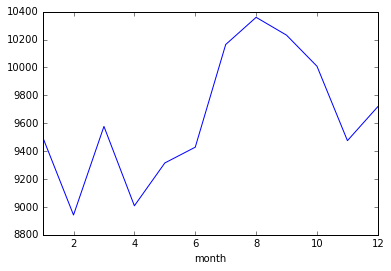

In [16]:
df_month['num_births'].plot(kind = 'line')

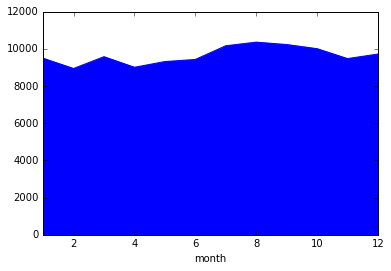

In [17]:
df_month['num_births'].plot(kind = 'area')

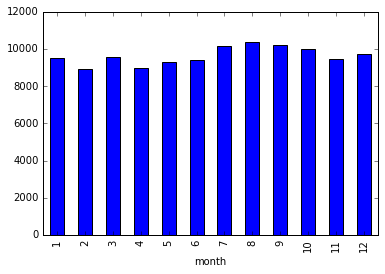

In [18]:
df_month['num_births'].plot(kind = 'bar')

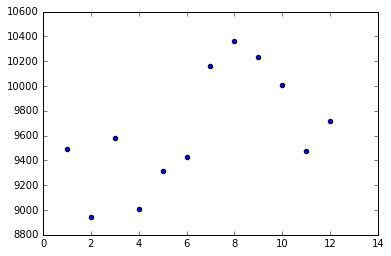

In [19]:
ax = plt.scatter(x = df_month.index, y =df_month.num_births)

In [20]:
df_month

num_births  time   year  quarters
month                                   
1            9493  5580  61845        31
2            8942  5611  61845        31
3            9577  5642  61845        31
4            9008  5673  61845        62
5            9315  5704  61845        62
6            9428  5735  61845        62
7           10164  5766  61845        93
8           10359  5797  61845        93
9           10231  5828  61845        93
10          10008  5859  61845       124
11           9475  5890  61845       124
12           9719  5921  61845       124

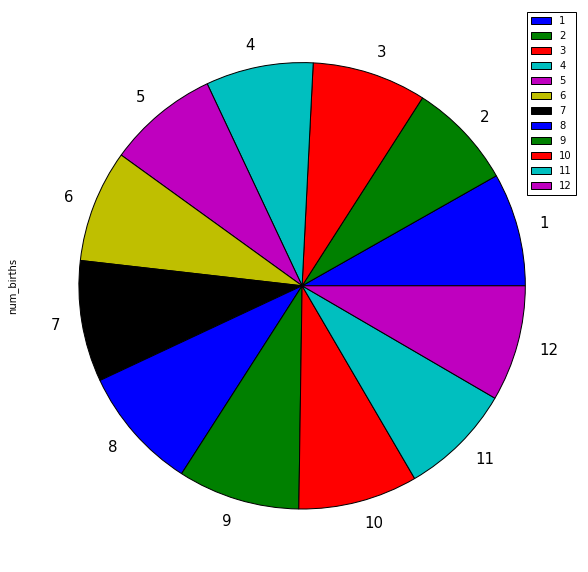

In [21]:
ax = df_month['num_births'].plot('pie', figsize=(10,10),fontsize = 15)
ax.legend(fontsize = 10)
plt.show()

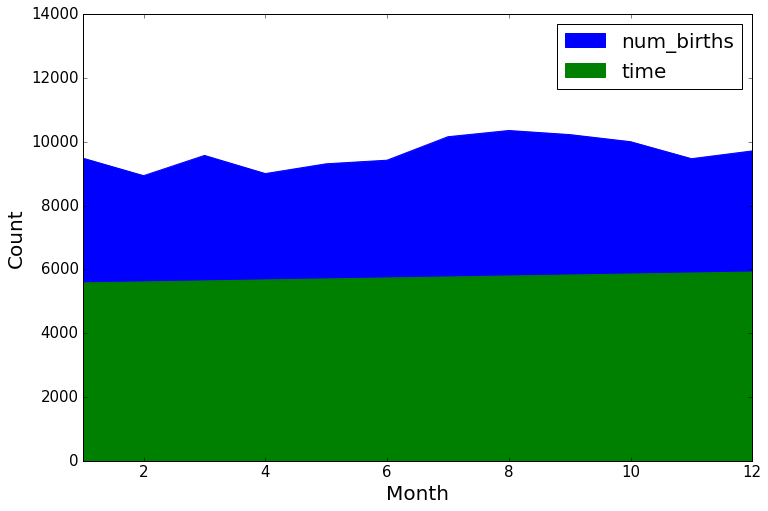

In [22]:
ax = df_month['num_births'].plot('area', figsize=(20,10),fontsize = 15)
ax = df_month['time'].plot('area', figsize=(12,8),fontsize = 15)
ax.set_xlabel('Month', fontsize = 20)
ax.set_ylabel('Count',fontsize = 20)
ax.set_ylim(0,14000)
ax.legend(fontsize = 20)
plt.show()

In [23]:
df_month

num_births  time   year  quarters
month                                   
1            9493  5580  61845        31
2            8942  5611  61845        31
3            9577  5642  61845        31
4            9008  5673  61845        62
5            9315  5704  61845        62
6            9428  5735  61845        62
7           10164  5766  61845        93
8           10359  5797  61845        93
9           10231  5828  61845        93
10          10008  5859  61845       124
11           9475  5890  61845       124
12           9719  5921  61845       124

In [24]:
idx = np.argmax(df_month.num_births)
print idx,df_month.num_births[idx]
df_month.loc[idx].num_births

8 10359


10359

In [25]:
df_month.idxmax()

num_births     8
time          12
year           1
quarters      10
dtype: int64

In [26]:
df_month.num_births.idxmax()

8

In [27]:
df_month.num_births[idx]

10359

In [28]:
df_year = df.groupby('year').sum()['num_births']
indx = np.argmax(df_year)
indx

1993

In [29]:
df.groupby('year').mean()['num_births'].idxmax()

1993

In [30]:
birthSeries = pd.Series(df['num_births'])
bs = pd.Series(df['num_births'])
birthSeries.head(2)

dates
1980-01-31    295
1980-02-29    286
Name: num_births, dtype: int64

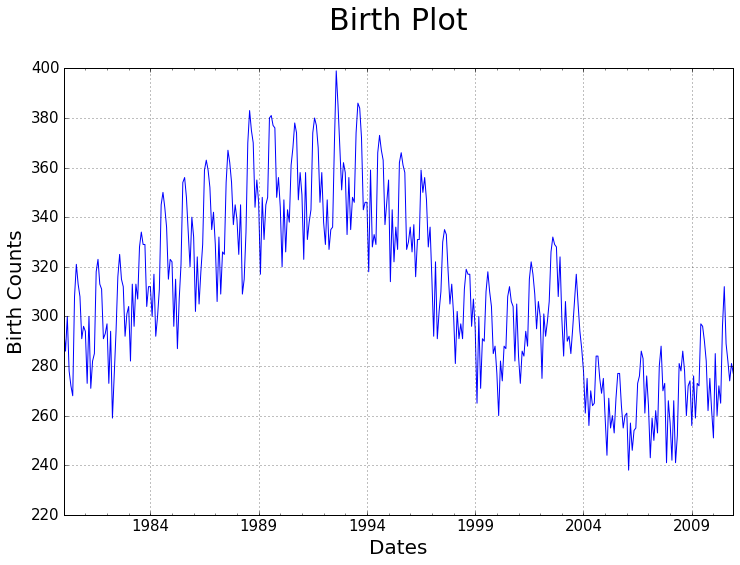

In [31]:
ax = birthSeries.plot(figsize=(12,8), fontsize = 15,kind='line',grid=True)
ax.set_xlabel('Dates',fontsize = 20)
ax.set_ylabel('Birth Counts', fontsize = 20)
ax.set_title('Birth Plot\n', fontsize = 30)
plt.show()

Plot the data for 2006-2010, is the seasonal pattern more apparent?

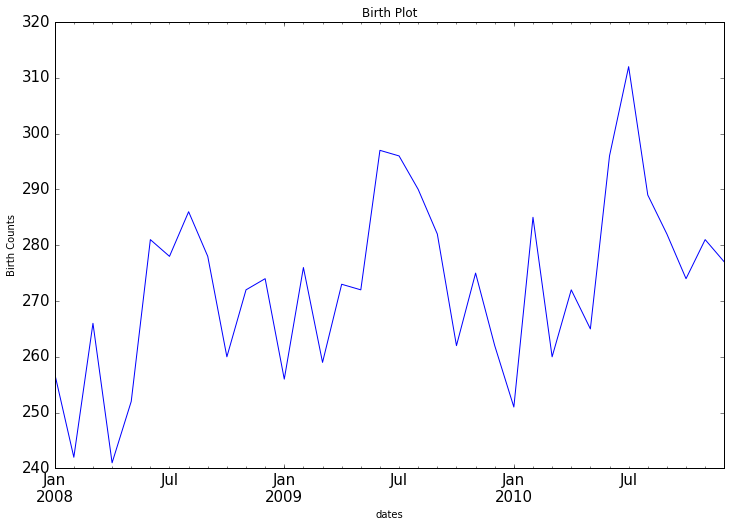

In [32]:
#birthSeries = pd.Series(df['num_births'])
ax = birthSeries['2008':'2010'].plot(fontsize = 15, title='Birth Plot',figsize=(12,8))
ax.set_xlabel('dates')
ax.set_ylabel('Birth Counts')
plt.show()

Use df.resample('Q-NOV') to get quarterly means that follow the seasons of the year (spring, summer, fall, winter).


In [33]:
df['num_births'].head()

dates
1980-01-31    295
1980-02-29    286
1980-03-31    300
1980-04-30    278
1980-05-31    272
Name: num_births, dtype: int64

In [34]:
bs.resample('A').mean().head() #year end

dates
1980-12-31    294.666667
1981-12-31    296.166667
1982-12-31    296.166667
1983-12-31    312.583333
1984-12-31    320.416667
Freq: A-DEC, Name: num_births, dtype: float64

In [35]:
bs.resample('Q').mean().head()

dates
1980-03-31    293.666667
1980-06-30    272.666667
1980-09-30    314.000000
1980-12-31    298.333333
1981-03-31    289.000000
Freq: Q-DEC, Name: num_births, dtype: float64

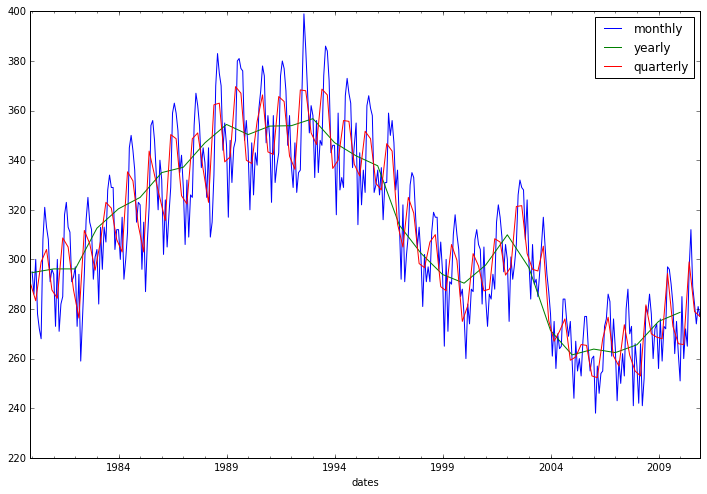

In [36]:
bs.plot(figsize=(12,8), label = 'monthly')
bs.resample('A').mean().plot(label = 'yearly')
bs.resample('Q-NOV').mean().plot(label = 'quarterly')
plt.legend();

In [37]:
df['time^2'] = df['time']**2
df['time^3'] = df['time']**3
df['time^4'] = df['time']**4
df['time^5'] = df['time']**5
df.head()

num_births  time  month  year  quarters  time^2  time^3  time^4  \
dates                                                                         
1980-01-31         295     0      1  1980         1       0       0       0   
1980-02-29         286     1      2  1980         1       1       1       1   
1980-03-31         300     2      3  1980         1       4       8      16   
1980-04-30         278     3      4  1980         2       9      27      81   
1980-05-31         272     4      5  1980         2      16      64     256   

            time^5  
dates               
1980-01-31       0  
1980-02-29       1  
1980-03-31      32  
1980-04-30     243  
1980-05-31    1024

In [38]:
type(df['num_births'])

pandas.core.series.Series

In [39]:
type(df['num_births'].values)

numpy.ndarray

In [40]:
y = df['num_births'].values
X = df['time'].values

In [41]:
model = sm.OLS(y, sm.add_constant(X)).fit()

In [42]:
model.params

array([  3.42255081e+02,  -1.68099732e-01])

In [43]:
model.fittedvalues[:10]

array([ 342.25508086,  342.08698113,  341.9188814 ,  341.75078167,
        341.58268193,  341.4145822 ,  341.24648247,  341.07838274,
        340.91028301,  340.74218328])

### If use X = df['time] instead of df['time'].values, then no need to add index = df.index since it's already indexed.

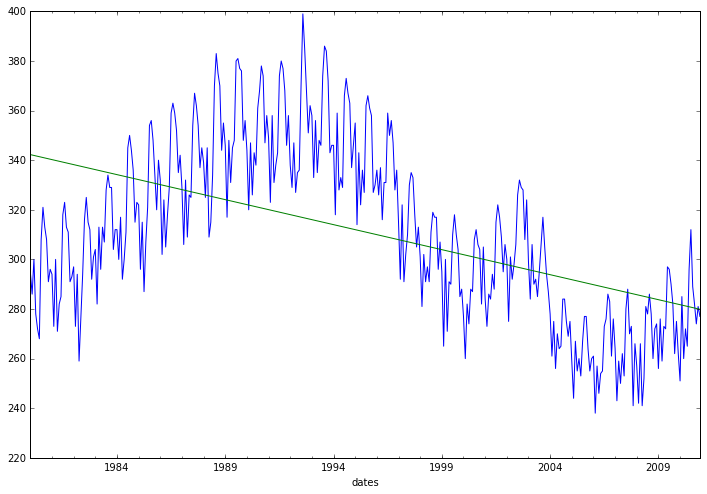

In [44]:
bs.plot(figsize=(12,8))
pd.Series(model.fittedvalues, index = df.index).plot();
# df['time'].plot();

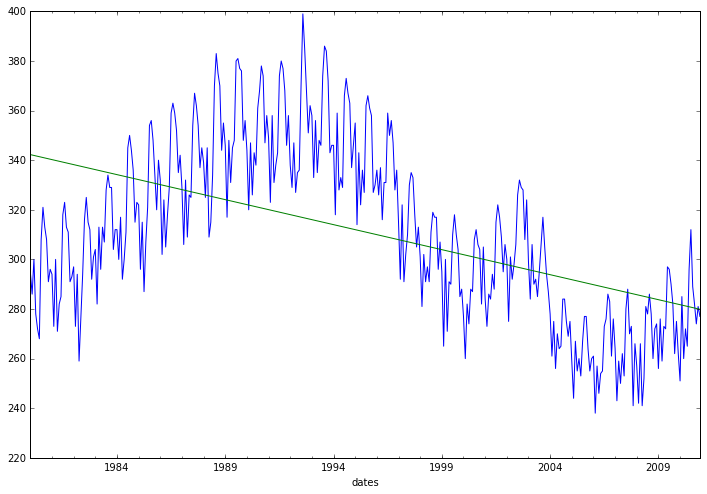

In [45]:
y = df['num_births'].values #no index
X = df['time'] #keep the index
model = sm.OLS(y, sm.add_constant(X)).fit()
bs.plot(figsize=(12,8))
model.fittedvalues.plot(); # still indexed, same as bs

In [46]:
model.fittedvalues[:10] #show the index

dates
1980-01-31    342.255081
1980-02-29    342.086981
1980-03-31    341.918881
1980-04-30    341.750782
1980-05-31    341.582682
1980-06-30    341.414582
1980-07-31    341.246482
1980-08-31    341.078383
1980-09-30    340.910283
1980-10-31    340.742183
dtype: float64

In [47]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     133.0
Date:                Mon, 23 Jan 2017   Prob (F-statistic):           1.72e-26
Time:                        22:10:59   Log-Likelihood:                -1794.5
No. Observations:                 372   AIC:                             3593.
Df Residuals:                     370   BIC:                             3601.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        342.2551      3.125    109.535      0.000       336.111   348.399
time          -0.1681      0.015    -11.531      0.000        -0.197    -0.139
==============================================================================
Omnibus:                        3.968   Durbin-Watson:                   0.316
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                3.093
Skew:                           0.099   Prob(JB):                        0.213
Kurtosis:                       2.600   Cond. No.                         428.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

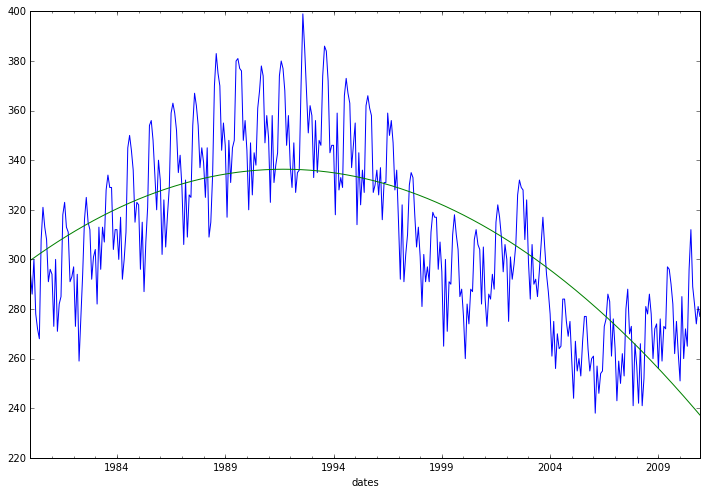

In [48]:
y = df['num_births'].values
X = df[['time', 'time^2']]
model = sm.OLS(y, sm.add_constant(X)).fit()
bs.plot(figsize=(12,8))
model.fittedvalues.plot()

In [49]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     239.0
Date:                Mon, 23 Jan 2017   Prob (F-statistic):           2.62e-67
Time:                        22:10:59   Log-Likelihood:                -1697.0
No. Observations:                 372   AIC:                             3400.
Df Residuals:                     369   BIC:                             3412.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        299.6021      3.600     83.232      0.000       292.524   306.680
time           0.5236      0.045     11.681      0.000         0.435     0.612
time^2        -0.0019      0.000    -15.941      0.000        -0.002    -0.002
==============================================================================
Omnibus:                        5.782   Durbin-Watson:                   0.534
Prob(Omnibus):                  0.056   Jarque-Bera (JB):                5.168
Skew:                           0.222   Prob(JB):                       0.0755
Kurtosis:                       2.630   Cond. No.                     1.84e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

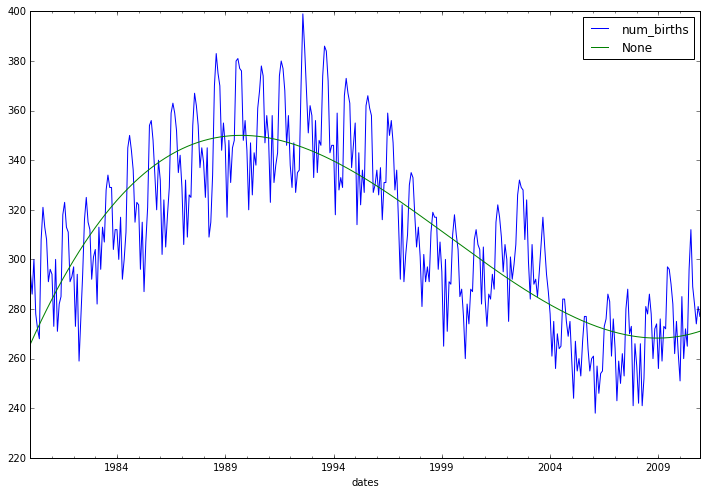

In [50]:
X = df[['time', 'time^2', 'time^3']]
model3 = sm.OLS(y, sm.add_constant(X)).fit()
bs.plot(figsize=(12,8))
model3.fittedvalues.plot()
plt.legend();

In [51]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     287.6
Date:                Mon, 23 Jan 2017   Prob (F-statistic):           4.31e-96
Time:                        22:11:00   Log-Likelihood:                -1627.0
No. Observations:                 372   AIC:                             3262.
Df Residuals:                     368   BIC:                             3278.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        265.8165      3.963     67.074      0.000       258.023   273.609
time           1.6238      0.093     17.529      0.000         1.442     1.806
time^2        -0.0093      0.001    -15.996      0.000        -0.010    -0.008
time^3      1.334e-05   1.03e-06     12.968      0.000      1.13e-05  1.54e-05
==============================================================================
Omnibus:                        3.849   Durbin-Watson:                   0.778
Prob(Omnibus):                  0.146   Jarque-Bera (JB):                3.070
Skew:                           0.106   Prob(JB):                        0.215
Kurtosis:                       2.609   Cond. No.                     7.67e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.67e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

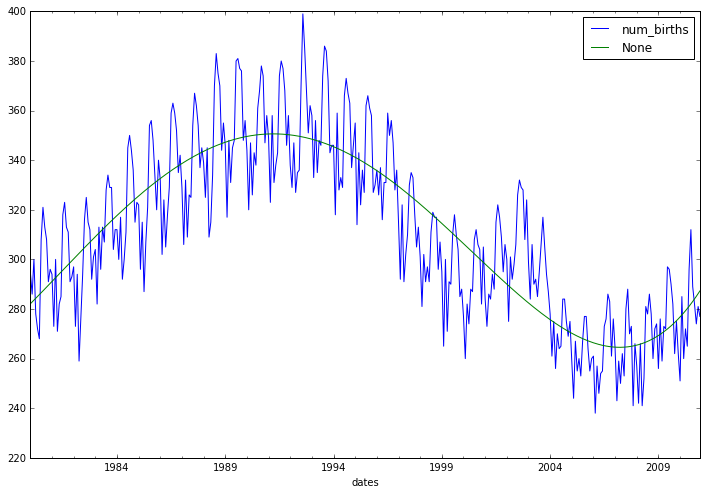

In [52]:
X = df[['time', 'time^2', 'time^3', 'time^4']]
bs.plot(figsize = (12,8))
model4 = sm.OLS(y, sm.add_constant(X)).fit()
model4.fittedvalues.plot()
plt.legend();

In [53]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     243.3
Date:                Mon, 23 Jan 2017   Prob (F-statistic):          8.01e-102
Time:                        22:11:00   Log-Likelihood:                -1610.7
No. Observations:                 372   AIC:                             3231.
Df Residuals:                     367   BIC:                             3251.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        282.0876      4.719     59.782      0.000       272.809   291.367
time           0.7359      0.177      4.164      0.000         0.388     1.083
time^2         0.0015      0.002      0.781      0.435        -0.002     0.005
time^3       -3.2e-05   7.87e-06     -4.068      0.000     -4.75e-05 -1.65e-05
time^4       6.11e-08   1.05e-08      5.810      0.000      4.04e-08  8.18e-08
==============================================================================
Omnibus:                        3.293   Durbin-Watson:                   0.850
Prob(Omnibus):                  0.193   Jarque-Bera (JB):                2.683
Skew:                           0.092   Prob(JB):                        0.261
Kurtosis:                       2.627   Cond. No.                     3.12e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
df.head()

num_births  time  month  year  quarters  time^2  time^3  time^4  \
dates                                                                         
1980-01-31         295     0      1  1980         1       0       0       0   
1980-02-29         286     1      2  1980         1       1       1       1   
1980-03-31         300     2      3  1980         1       4       8      16   
1980-04-30         278     3      4  1980         2       9      27      81   
1980-05-31         272     4      5  1980         2      16      64     256   

            time^5  
dates               
1980-01-31       0  
1980-02-29       1  
1980-03-31      32  
1980-04-30     243  
1980-05-31    1024

Now that you have fit trend, add in the monthly component via dummy variables to capture seasonality. You could also try to create a 'seasons of the year' variable and fit the quarterly time series instead of the original monthly time you plotted earlier...opportunity to play around.

In [55]:
X = pd.get_dummies(df[['time','time^2','time^3','time^4','month']],
                   columns=['month']).drop('month_1',axis = 1)

In [56]:
X.shape

(372, 15)

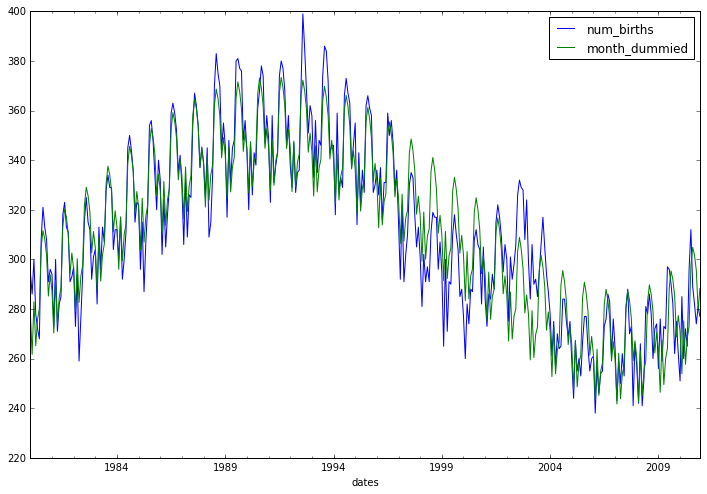

In [57]:
model_m = sm.OLS(y, sm.add_constant(X)).fit()
bs.plot(figsize=(12,8))
model_m.fittedvalues.plot(label = 'month_dummied')
plt.legend();

In [58]:
model_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     197.2
Date:                Mon, 23 Jan 2017   Prob (F-statistic):          4.32e-162
Time:                        22:11:01   Log-Likelihood:                -1436.6
No. Observations:                 372   AIC:                             2905.
Df Residuals:                     356   BIC:                             2968.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        278.7809      3.588     77.695      0.000       271.724   285.838
time           0.6978      0.112      6.206      0.000         0.477     0.919
time^2         0.0018      0.001      1.435      0.152        -0.001     0.004
time^3     -3.254e-05      5e-06     -6.505      0.000     -4.24e-05 -2.27e-05
time^4       6.13e-08   6.69e-09      9.165      0.000      4.81e-08  7.45e-08
month_2      -17.7778      2.988     -5.950      0.000       -23.654   -11.902
month_3        2.7017      2.988      0.904      0.366        -3.174     8.578
month_4      -15.6583      2.988     -5.240      0.000       -21.535    -9.782
month_5       -5.7612      2.988     -1.928      0.055       -11.638     0.115
month_6       -2.1232      2.988     -0.711      0.478        -8.000     3.754
month_7       21.6105      2.988      7.231      0.000        15.733    27.488
month_8       27.8915      2.989      9.332      0.000        22.014    33.769
month_9       23.7519      2.989      7.946      0.000        17.874    29.630
month_10      16.5464      2.989      5.535      0.000        10.668    22.425
month_11      -0.6604      2.990     -0.221      0.825        -6.540     5.219
month_12       7.1958      2.990      2.407      0.017         1.315    13.076
==============================================================================
Omnibus:                        8.418   Durbin-Watson:                   0.733
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                8.343
Skew:                           0.334   Prob(JB):                       0.0154
Kurtosis:                       3.303   Cond. No.                     7.93e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.93e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Plot the dates variable (x) against the residuals (y) of the final model (including the seasonality term). Is there an obvious pattern of the residuals with respect to time? If there is any autocorrelation left in the model, there will be some pattern in your residual and we'll learn to address that in the afternoon.

In [59]:
df['resid'] = model.resid

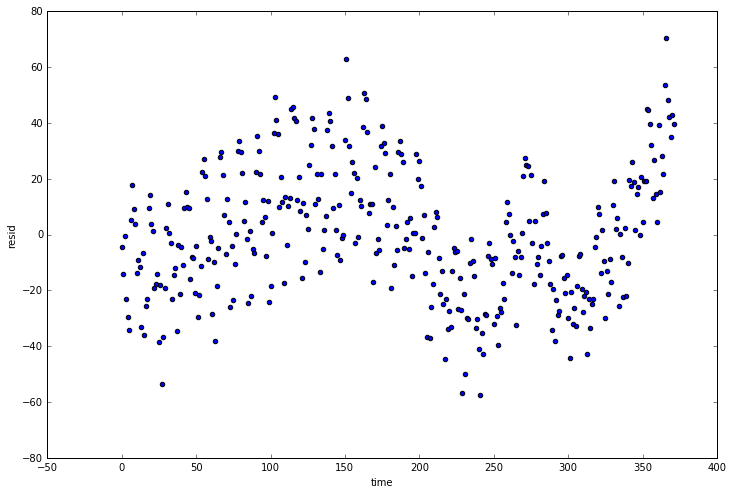

In [60]:
df.plot(x = 'time', y = 'resid',figsize = (12,8), kind = 'scatter');

In [61]:
pd.__version__

u'0.19.1'